In [11]:
import sys, os
if os.path.exists("/home/cb2714/wwa/wwa.py"):
     sys.path.append('/home/cb2714/wwa/')
else:
     sys.path.append('/rds/general/user/cb2714/home/wwa/')
from wwa import *

from taylorDiagram import TaylorDiagram, taylor_scores

xn, xx, yn, yx = [125,146,30,46]  # larger region for data retrieval
xn, xx, yn, yx = [125,133,30,40]  # smaller region for plotting

mapproj = cartopy.crs.PlateCarree()

rnm = "kr"

In [54]:
def seasonal_cycle(ts, sm = 1):
    
    # (possibly smoothed) climatology from 1990-2020, excluding day 366 (can lead to weird jumps in the series)
    sc = ts.rolling(time = sm, center = True).mean().sel(time = slice("1990","2020")).groupby("time.dayofyear").mean()
    
    return sc

def scale(ts): return (ts - ts.mean()) / ts.std()

# Seasonal cycle

In [122]:
framing = "cmip6"
varnm = "pr"
ndays = 15

# load obs
if varnm[:2] == "pr":
    ts = xr.open_dataset("daily-ts/pr_era5_195001-202503_"+rnm+".nc")
else:
    ts = xr.open_dataset(sorted(glob.glob("daily-ts/"+varnm+"*era5land*"+rnm+".nc"))[-1])
ts = ts[list(ts.data_vars)[0]]
sc_obs = seasonal_cycle(ts, ndays)

# list models & set up figures
fl = sorted(glob.glob("daily-ts/"+framing+"/"+varnm+"*"))
nc = 4; nr = int(np.ceil(len(fl)/nc))

days = pd.date_range(start = "2020-01-01", end = "2021-01-01")
labelticks = [i+1 for i in range(len(days)) if (days[i].day) == 15]
labels = [days[i].strftime("%b")[0] for i in range(len(days)) if (days[i].day) == 15]

col = {"hdwi-from-hursmin" : "tab:orange", "tasmax" : "firebrick", "hursmin" : "tab:green", "sfcWindmax" : "powderblue", "pr" : "tab:blue"}[varnm]

if varnm[:2] == "pr": 
    d_start = ts.sel(time = "2025-02-01").time.dt.dayofyear.values
    d_width = 59
else:
    d_start = ts.sel(time = "2025-03-01").time.dt.dayofyear.values
    d_width = 31

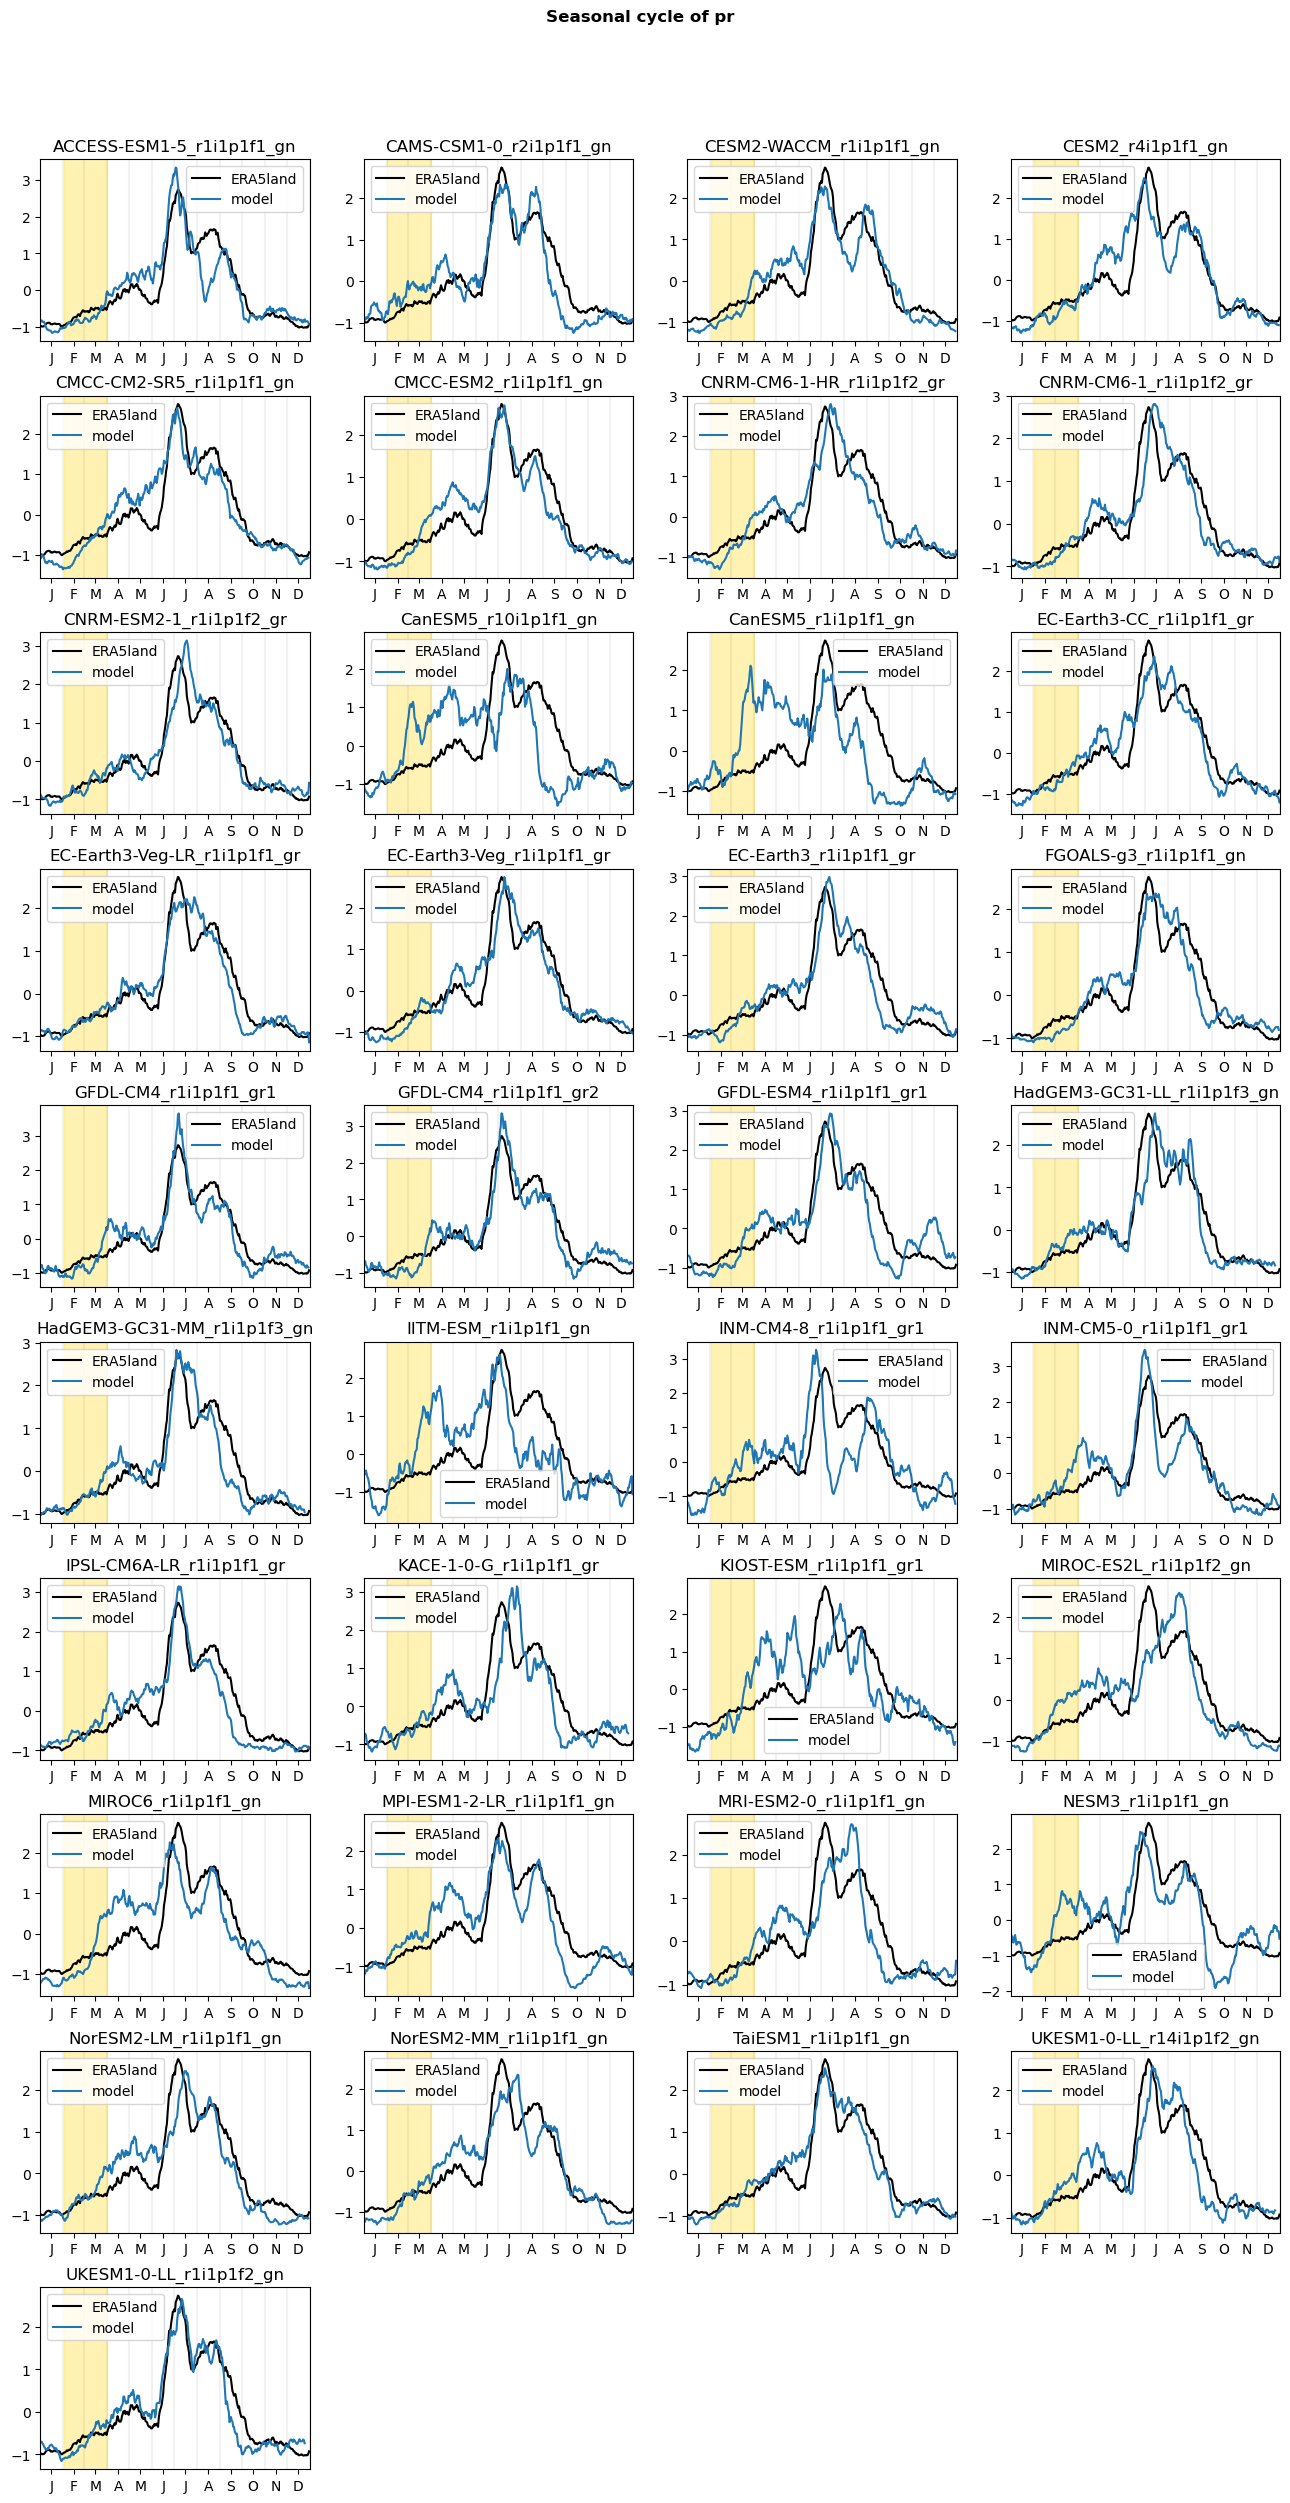

In [123]:
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.3)

for i in range(len(fl)):
    ax = fig.axes[i]
    
    mts = xr.open_dataset(fl[i])
    mts = mts[list(mts.data_vars)[0]]
    sc = seasonal_cycle(mts, sm = ndays)
    
    ax.plot(scale(sc_obs), color = "k", label = "ERA5land")
#     ax.plot(mswx, color = "darkblue")
    ax.plot(scale(sc), color = col, label = "model")
    
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    [ax.axvline(x, color = "k", alpha = 0.05) for x in range(len(days)) if (days[x].day) == 1]
    
    ylim = ax.get_ylim()
    ax.add_patch(Rectangle((d_start, ylim[0]-10), d_width, ylim[1]+20, color = "gold", alpha = 0.3))
    ax.set_ylim(ylim)

    ax.set_title("_".join(fl[i].split("_")[1:4]))
    ax.legend()
    ax.margins(x = 0)
    
for i in range(len(fl), len(fig.axes)): fig.axes[i].set_axis_off()
    
plt.suptitle("Seasonal cycle of "+re.sub("-"," ",varnm), fontweight = "bold", y = 0.93)
plt.savefig("fig/mdl-eval_seasonal-cycle_"+varnm+"-scaled_"+framing+".png")

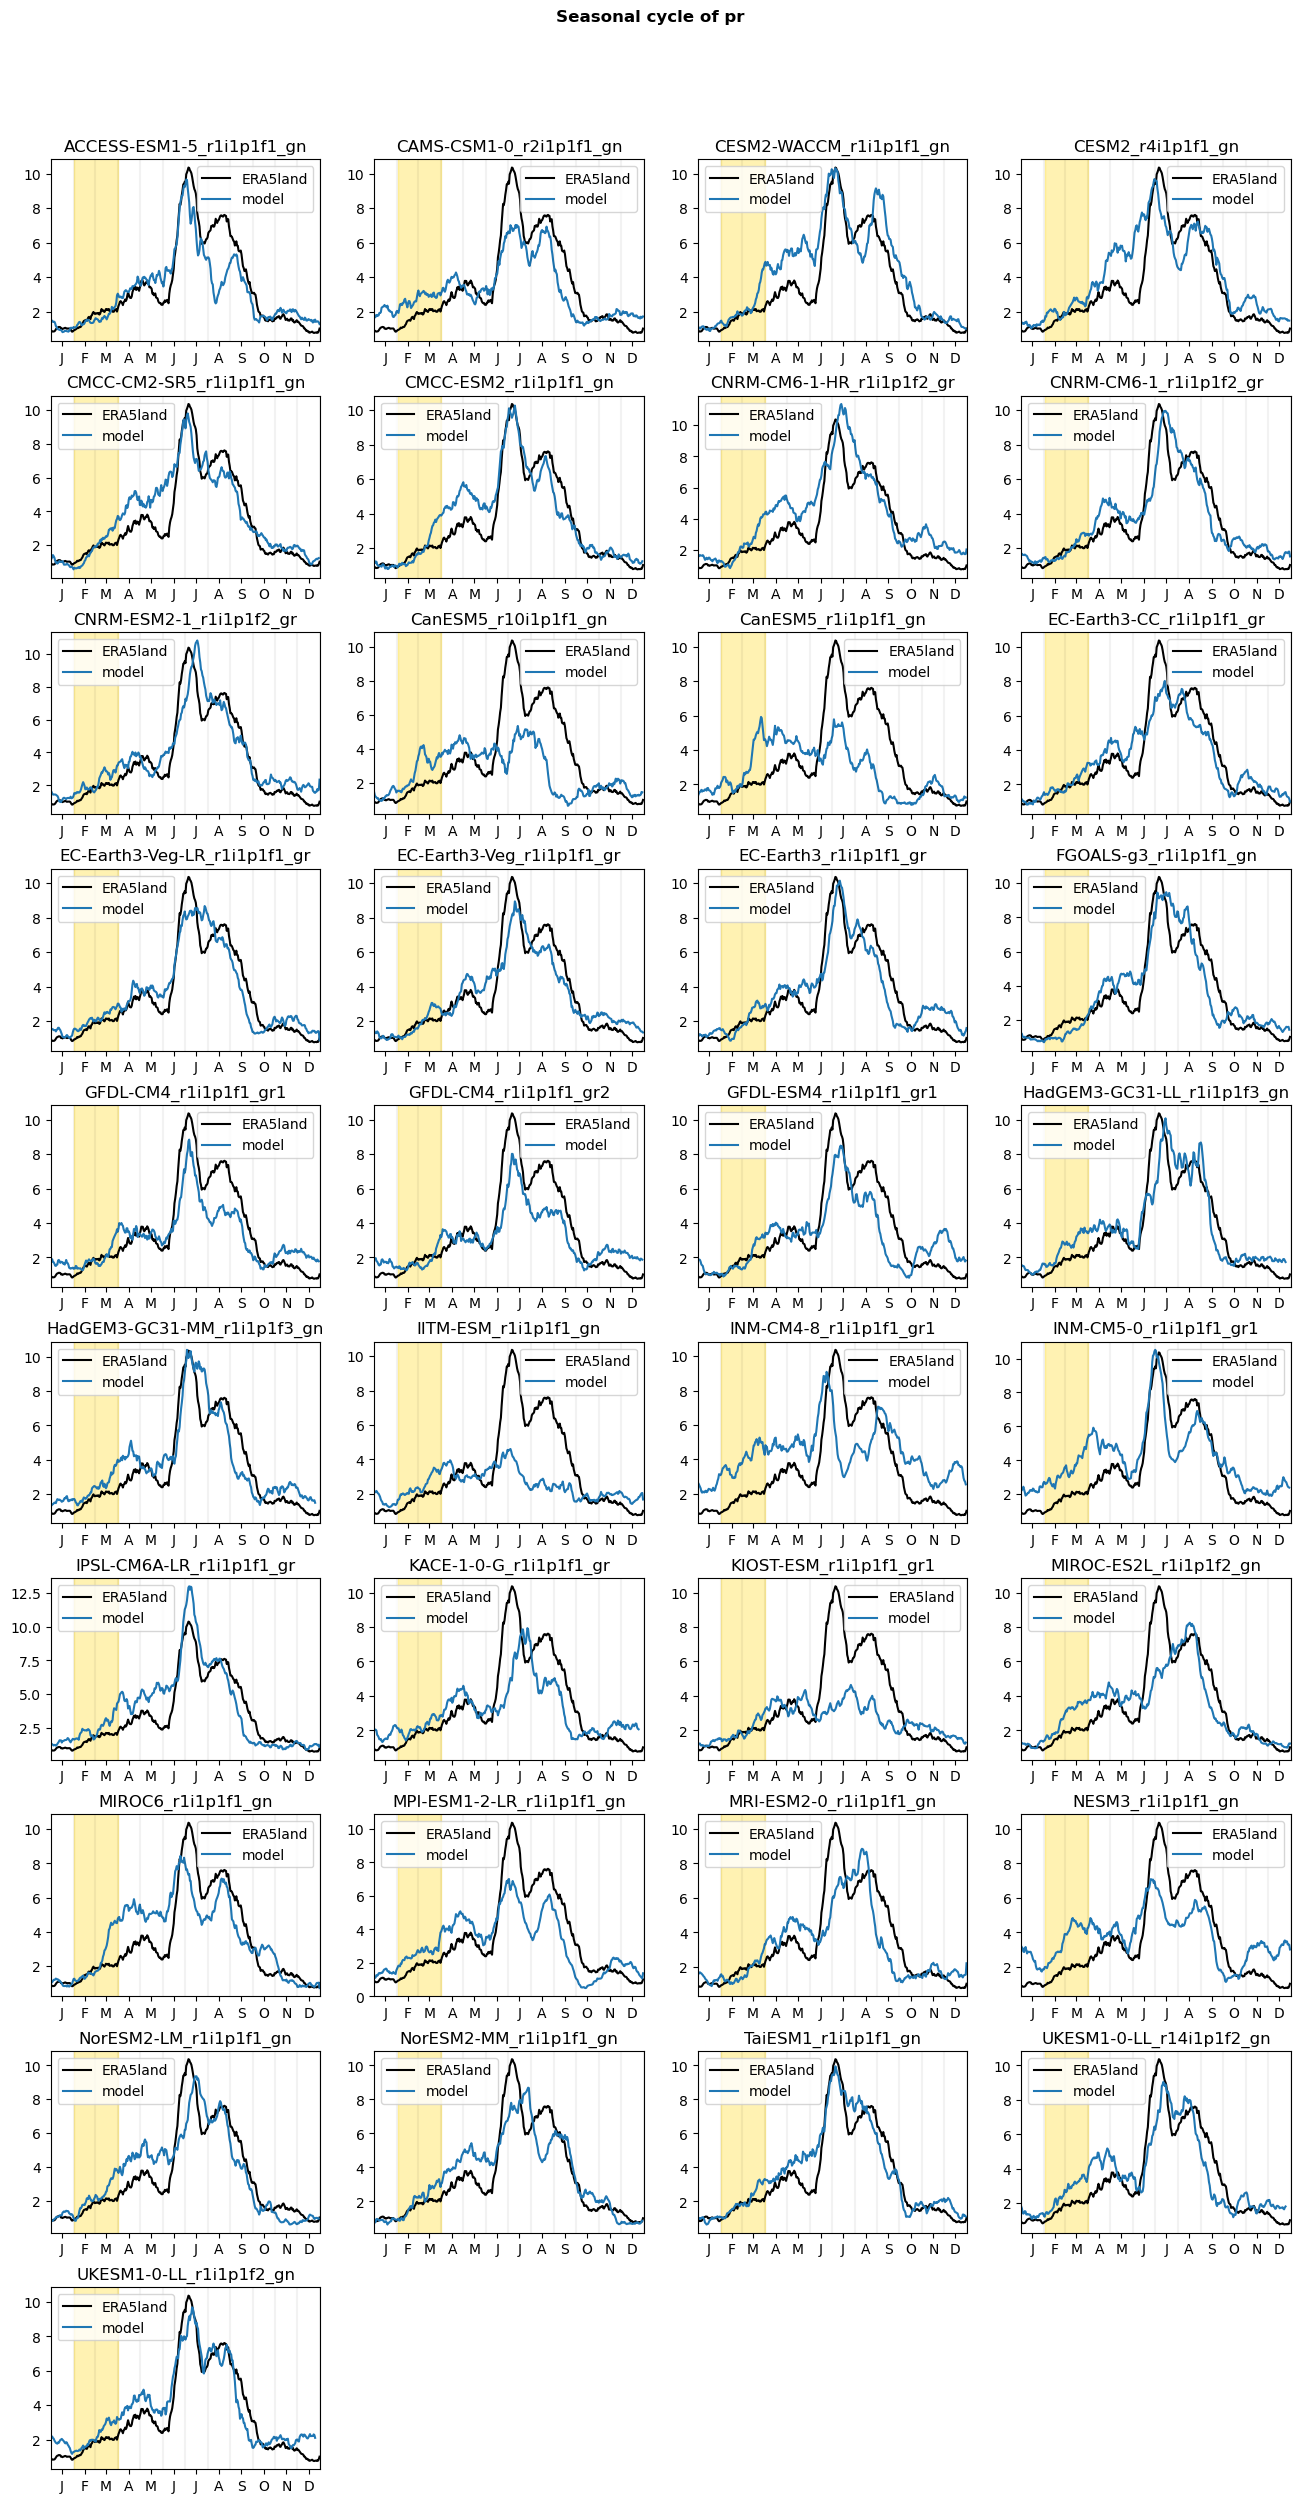

In [124]:
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 4, nr * 3), dpi = 100)
plt.subplots_adjust(hspace = 0.3)

for i in range(len(fl)):
    ax = fig.axes[i]
    
    mts = xr.open_dataset(fl[i])
    mts = mts[list(mts.data_vars)[0]]
    sc = seasonal_cycle(mts, sm = ndays)
    
    ax.plot((sc_obs), color = "k", label = "ERA5land")
#     ax.plot(mswx, color = "darkblue")
    ax.plot((sc), color = col, label = "model")
    
    ax.set_xticks(labelticks)
    ax.set_xticklabels(labels)
    [ax.axvline(x, color = "k", alpha = 0.05) for x in range(len(days)) if (days[x].day) == 1]
    
    ylim = ax.get_ylim()
    ax.add_patch(Rectangle((d_start, ylim[0]-10), d_width, ylim[1]+20, color = "gold", alpha = 0.3))
    ax.set_ylim(ylim)

    ax.set_title("_".join(fl[i].split("_")[1:4]))
    ax.legend()
    ax.margins(x = 0)
    
for i in range(len(fl), len(fig.axes)): fig.axes[i].set_axis_off()
    
plt.suptitle("Seasonal cycle of "+re.sub("-"," ",varnm), fontweight = "bold", y = 0.93)
plt.savefig("fig/mdl-eval_seasonal-cycle_"+varnm+"_"+framing+".png")